# Get unique tokens and assign index

In [1]:
#import library
import pandas as pd
import string
import matplotlib.pyplot as plt
import re
import numpy as np

df = pd.read_csv(r"D:\FYP\cyberbullying_preprocessed.csv")

In [2]:
df["text_length"] = df["clean_text"].apply(lambda x: len(x.split()))
df.head()

,tweet_text,cyberbullying_type,hate_speech,clean_text,text_length
0,"In other words #katandandre, your food was cra...",not_cyberbullying,0,"words #katandandre, food crapilicious! #mkr",5
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,0,#aussietv white? #mkr #theblock #imacelebritya...,11
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,0,classy whore? red velvet cupcakes?,5
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,0,"meh. p thanks heads up, concerned another angr...",10
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,0,isis account pretending kurdish account. like ...,8


In [3]:
# get min length of text
min_length = df['text_length'].min()
print(min_length)

# get max length of text
max_length = df['text_length'].max()
print(max_length)

1
415


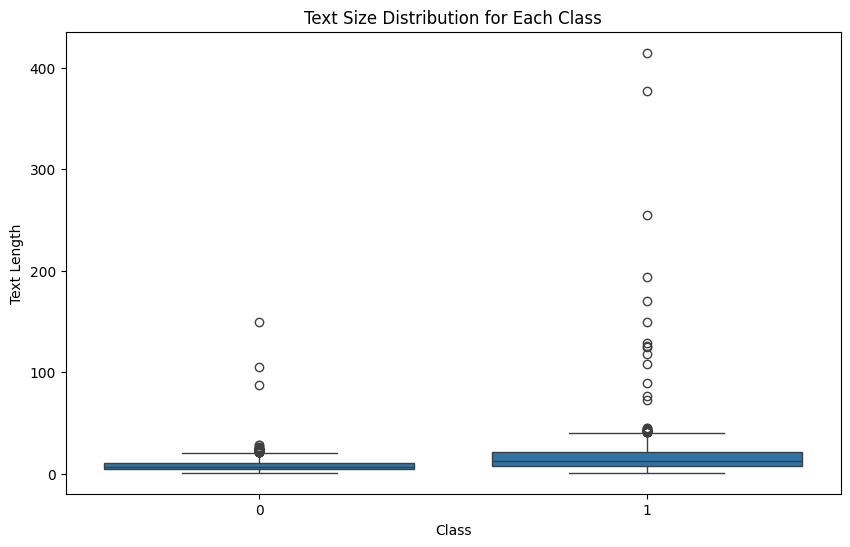

In [4]:
# visualize the size of text for each classes
import seaborn as sns

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='hate_speech', y='text_length', data=df)
plt.title('Text Size Distribution for Each Class')
plt.xlabel('Class')
plt.ylabel('Text Length')
plt.show()

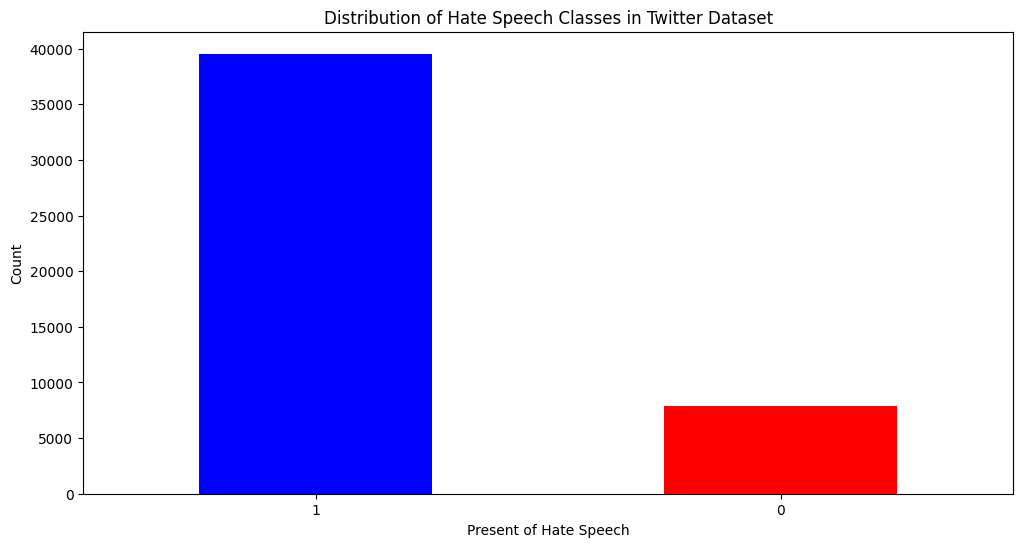

Total number of text that label as non hate = 7847
Total number of text that label as hate = 39538
Total unique value in column 'hate_speech': 
hate_speech
1    39538
0     7847
Name: count, dtype: int64


In [5]:
# visualize dataset
df100 = df[df['text_length'] <= 100].copy()

plt.figure(figsize=(12, 6))
count = df100['hate_speech'].value_counts()
count.plot(kind='bar',color=['blue', 'red'])
plt.title('Distribution of Hate Speech Classes in Twitter Dataset')
plt.xlabel('Present of Hate Speech')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# check and display the total number of occurrences of '0' in 'target'
count_nonhate = df100['hate_speech'].value_counts().get(0, 0)
print(f'Total number of text that label as non hate = {count_nonhate}')

count_hate = df100['hate_speech'].value_counts().get(1, 0)
print(f'Total number of text that label as hate = {count_hate}')

print('Total unique value in column \'hate_speech\': ')
print(df100['hate_speech'].value_counts())

In [6]:
# initialized BertTokenizer to load pretrained subword tokenizer and define function to perform subword tokenization
import tokenizers
from transformers import AutoTokenizer, BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def subword_tokenizer(text):
    tokenized_list = tokenizer.tokenize(text)
    return tokenized_list


print(df100.head())
df100['tokenized_text'] = df100['clean_text'].apply(subword_tokenizer)
print(df100.head())

# Create a list of all tokens in the DataFrame
all_tokens = [token for sublist in df100['tokenized_text'] for token in sublist]

# Create a set of unique tokens
unique_tokens = set(all_tokens)

# Create a vocabulary dictionary with numerical indices
vocab_dict = {token: idx+1 for idx, token in enumerate(unique_tokens)}

# Map the tokenized_text to numerical indices using the vocabulary
df100['numerical_tokens'] = df100['tokenized_text'].apply(lambda tokens: [vocab_dict[token] for token in tokens])

print(df100.head())
print(df100.info())

                                          tweet_text cyberbullying_type  \
0  In other words #katandandre, your food was cra...  not_cyberbullying   
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   

   hate_speech                                         clean_text  text_length  
0            0        words #katandandre, food crapilicious! #mkr            5  
1            0  #aussietv white? #mkr #theblock #imacelebritya...           11  
2            0                 classy whore? red velvet cupcakes?            5  
3            0  meh. p thanks heads up, concerned another angr...           10  
4            0  isis account pretending kurdish account. like ...            8  
                                          tweet_text cyberbully

In [7]:
print(vocab_dict)

{'##ively': 1, 'model': 2, 'evolve': 3, 'thatcher': 4, 'clutch': 5, 'directed': 6, 'liberation': 7, 'gina': 8, '##ary': 9, 'rudy': 10, '##th': 11, 'brush': 12, 'farther': 13, '##rent': 14, '##hog': 15, 'kits': 16, 'maddox': 17, 'lei': 18, 'het': 19, 'automotive': 20, 'pilot': 21, 'crates': 22, 'ups': 23, 'complement': 24, 'tasks': 25, 'silicon': 26, 'founders': 27, 'passage': 28, 'within': 29, 'polish': 30, 'liked': 31, 'mutter': 32, 'xander': 33, 'upon': 34, 'hello': 35, 'laws': 36, 'ignoring': 37, '##ly': 38, '##ul': 39, 'angels': 40, '##thy': 41, 'tango': 42, 'piper': 43, 'simulator': 44, 'esther': 45, '##pop': 46, 'lori': 47, '##pire': 48, '##yst': 49, '##oder': 50, 'queue': 51, 'culturally': 52, 'swift': 53, 'mma': 54, '##vel': 55, 'ourselves': 56, '##mmer': 57, '##rina': 58, 'infrastructure': 59, 'gaining': 60, 'item': 61, 'satin': 62, 'constantinople': 63, 'gabriel': 64, 'aim': 65, 'corporal': 66, 'elias': 67, 'smart': 68, 'participates': 69, 'kevin': 70, 'byu': 71, 'otto': 72, 

# Create word embedding vectors for each unique word

In [8]:
# load GloVe model and save in word2vec format
import gensim.downloader as api
from gensim.models import KeyedVectors

#word2vec = api.load('word2vec-google-news-300')

path = "D:\Desktop\word2vec-google-news-300.bin"

#word2vec.save_word2vec_format(path, binary=True)

In [9]:
word2vec = KeyedVectors.load_word2vec_format(path, binary=True)

In [10]:
# define embedding size
embedding_size = 300
vocab_size=len(vocab_dict)+1

# define initial embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_size))

# modify embedding matrix is tokens exist in the word2vec embedding technique
for word, i in vocab_dict.items():
    try:
        embedding_matrix[i] = word2vec[word]
    except KeyError:
        embedding_matrix[i]=np.zeros(embedding_size)

In [11]:
df100["text_length"] = df100["tokenized_text"].apply(lambda x: len(x))

# Drop rows where 'text_length' is 0
df100 = df100[df100['text_length'] != 0]

# Resetting the index after dropping rows
df100 = df100.reset_index(drop=True)

# Now df contains only the rows where 'text_length' is not 0
print(df100.head())

# get max length of text
min_length = df100['text_length'].min()
print(min_length)

# get max length of text
max_length = df100['text_length'].max()
print(max_length)

                                          tweet_text cyberbullying_type  \
0  In other words #katandandre, your food was cra...  not_cyberbullying   
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   

   hate_speech                                         clean_text  \
0            0        words #katandandre, food crapilicious! #mkr   
1            0  #aussietv white? #mkr #theblock #imacelebritya...   
2            0                 classy whore? red velvet cupcakes?   
3            0  meh. p thanks heads up, concerned another angr...   
4            0  isis account pretending kurdish account. like ...   

   text_length                                     tokenized_text  \
0           15  [words, #, kata, ##nda, ##nd, ##re, ,, food, c...

# Training Preparation

In [12]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences


X = df100['numerical_tokens']
y = df100['hate_speech']

# split X and y into train test validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=77)

# instantiate the RandomOverSampler
oversampler = RandomOverSampler(random_state=66)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train.values.reshape(-1,1), y_train)
X_train = pd.Series(X_train_resampled.flatten())
y_train = pd.Series(y_train_resampled)

# pad the text to have same length
X_train = pad_sequences(X_train,maxlen=max_length, padding='post')
X_val = pad_sequences(X_val,maxlen=max_length, padding='post')
X_test = pad_sequences(X_test,maxlen=max_length, padding='post')

print(X_train[0])

# convert target to array
y_train = np.asarray(y_train).astype('float32')
y_val = np.asarray(y_val).astype('float32')
y_test = np.asarray(y_test).astype('float32')

# printing shape
print('Shape of X train:', X_train.shape)
print('Shape of y train:', y_train.shape)

# printing shape
print('Shape of X val:', X_val.shape)
print('Shape of y val:', y_val.shape)

# printing shape
print('Shape of X test:', X_test.shape)
print('Shape of y test:', y_test.shape)


[13274 12474 15295 16819 19164 19388 10183  2562     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0]
Shape of X train: (63198, 139)
Shape of y train: (63198,)
Shape of X val: (4739, 139)
Shape of y val: (4739,)
Shape of X test: (4738, 139)
Shape of y te

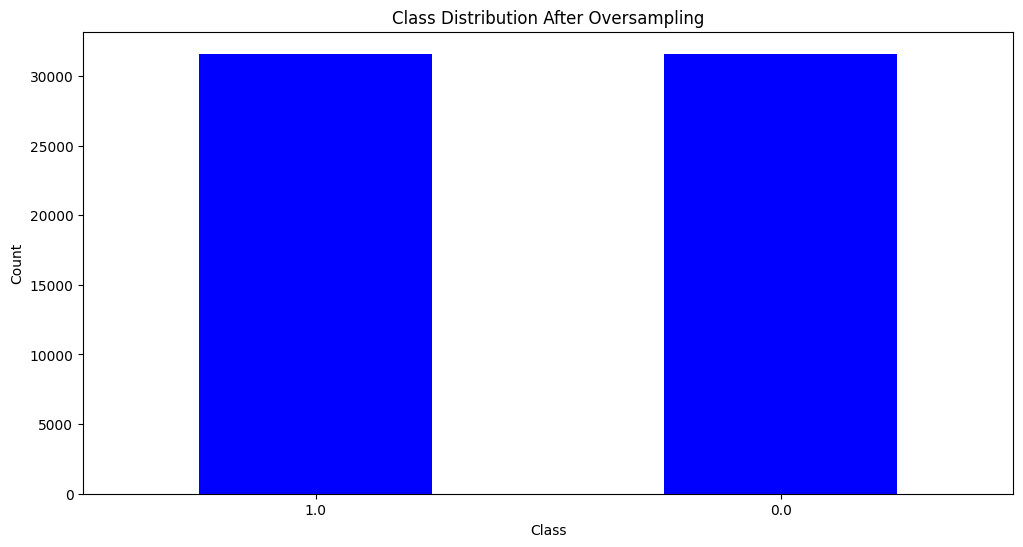

Total number of text that label as non hate = 31599
Total number of text that label as hate = 31599
Total unique value in column 'hate_speech': 
hate_speech
1.0    31599
0.0    31599
Name: count, dtype: int64


In [13]:
# Create a DataFrame to display the class distribution
new_df = pd.DataFrame({'hate_speech': y_train})
class_counts = new_df['hate_speech'].value_counts()

# Plot a bar graph
plt.figure(figsize=(12, 6))
class_counts.plot(kind='bar', color='blue')
plt.title('Class Distribution After Oversampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

count_nonhate = new_df['hate_speech'].value_counts().get(0, 0)
print(f'Total number of text that label as non hate = {count_nonhate}')

count_hate = new_df['hate_speech'].value_counts().get(1, 0)
print(f'Total number of text that label as hate = {count_hate}')

print('Total unique value in column \'hate_speech\': ')
print(new_df['hate_speech'].value_counts())

# Deep Learning model without hypertuning

In [14]:
# import libraries
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Input, Conv1D, MaxPooling1D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, Callback
from tensorflow.keras import regularizers
from keras.metrics import Precision, Recall, F1Score

In [15]:
import tensorflow as tf
# Define a custom callback to skip the first epoch's results
class EpochNumCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        logs['epoch_nums'] = epoch+1
        # Only process metrics from the second epoch onwards
        super().on_epoch_end(epoch, logs)
            
callback = [EpochNumCallback(), EarlyStopping(monitor='val_f1_score', patience=3, mode='max', restore_best_weights=True, start_from_epoch=5)]


In [16]:
input_size = X_train.shape[1]

embedding_layer = Embedding(vocab_size, embedding_size, weights=[embedding_matrix], trainable=True)

input_layer = Input(shape=(input_size,))
embedding = embedding_layer(input_layer)

conv = Conv1D(32, 10, activation='relu', kernel_regularizer=regularizers.l2(3), padding='same')(embedding)
maxpool = MaxPooling1D(3)(conv)
flatten = Flatten()(maxpool)
dropout = Dropout(0.3)(flatten)
dense = Dense(32)(dropout)
output_layer = Dense(units=1, activation='sigmoid')(dense)

model = Model(input_layer, output_layer)

optimizer = Adam(learning_rate=0.0005)
    
model.compile(optimizer=optimizer, 
            loss='binary_crossentropy', 
            metrics=['accuracy', Precision(thresholds=0.5), Recall(thresholds=0.5), F1Score(threshold=0.5)])

In [17]:
nhp_history = model.fit(X_train, 
          y_train, 
          epochs=30, 
          batch_size=32, 
          validation_data=(X_val, y_val), 
          callbacks=callback)

Epoch 1/30


1975/1975 [==============================] - 158s 79ms/step - loss: 2.6045 - accuracy: 0.8260 - precision: 0.8776 - recall: 0.7577 - f1_score: 0.8133 - val_loss: 0.5027 - val_accuracy: 0.8225 - val_precision: 0.9688 - val_recall: 0.8142 - val_f1_score: 0.8848 - epoch_nums: 1.0000
Epoch 2/30
1975/1975 [==============================] - 149s 75ms/step - loss: 0.4524 - accuracy: 0.8790 - precision: 0.9263 - recall: 0.8235 - f1_score: 0.8719 - val_loss: 0.5627 - val_accuracy: 0.8088 - val_precision: 0.9670 - val_recall: 0.7988 - val_f1_score: 0.8749 - epoch_nums: 2.0000
Epoch 3/30
1975/1975 [==============================] - 151s 76ms/step - loss: 0.4221 - accuracy: 0.8979 - precision: 0.9391 - recall: 0.8511 - f1_score: 0.8929 - val_loss: 0.5622 - val_accuracy: 0.8341 - val_precision: 0.9397 - val_recall: 0.8568 - val_f1_score: 0.8964 - epoch_nums: 3.0000
Epoch 4/30
1975/1975 [==============================] - 153s 78ms/step - loss: 0.4071 - accuracy: 0.9097 - precision: 0.94

149/149 [==============================] - 1s 5ms/step
predicted_accuracy = 0.8176445757703672
predicted_precision = 0.9152859433458044
predicted_recall = 0.8622860020140987
predicted_f1_score = 0.887995851698211


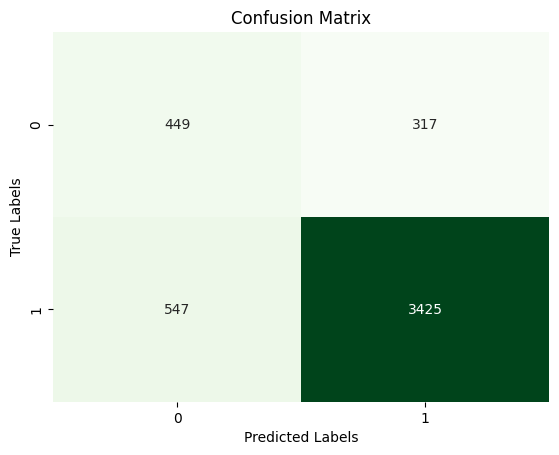

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# predict using trained model with X_test dataset
y_pred = model.predict(X_test)
y_pred_binary = (y_pred >= 0.5).astype('float32')


# Accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'predicted_accuracy = {accuracy}')
# Precision
precision = precision_score(y_test, y_pred_binary)
print(f'predicted_precision = {precision}')
# Recall
recall = recall_score(y_test, y_pred_binary)
print(f'predicted_recall = {recall}')
# F1 Score
f1 = f1_score(y_test, y_pred_binary)
print(f'predicted_f1_score = {f1}')

# compute confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

## Deep learning model hypertuning

In [19]:
from sklearn.utils.class_weight import compute_class_weight

input_size = X_train.shape[1]

def cnn_model(hp):
    conv_filters = hp.Choice("conv_filters", values=[16, 32, 64, 128])
    dense_units = hp.Choice("dense_units", values=[16, 32, 64, 128])
    learning_rate = hp.Choice("learning_rate", values=[0.0001, 0.0005, 0.001, 0.005])
    
    embedding_layer = Embedding(vocab_size, embedding_size, weights=[embedding_matrix], trainable=True)

    input_layer = Input(shape=(input_size,))
    embedding = embedding_layer(input_layer)

    conv = Conv1D(conv_filters, 10, activation='relu', kernel_regularizer=regularizers.l2(3), padding='same')(embedding)
    maxpool = MaxPooling1D(3)(conv)
    flatten = Flatten()(maxpool)
    dropout = Dropout(0.3)(flatten)
    dense = Dense(dense_units)(dropout)
    output_layer = Dense(units=1, activation='sigmoid')(dense)

    model = Model(input_layer, output_layer)

    optimizer = Adam(learning_rate=learning_rate)
    
    model.compile(optimizer=optimizer, 
                  loss='binary_crossentropy', 
                  metrics=['accuracy', Precision(thresholds=0.5), Recall(thresholds=0.5), F1Score(threshold=0.5)])

    return model

In [20]:
# Instantiate the tuner
import keras_tuner as kt
from keras_tuner import Objective
from keras_tuner.tuners import GridSearch

tuner = kt.GridSearch(
    cnn_model,
    objective=Objective('val_f1_score', direction='max'),
    directory='CNN Grid Tuning',
    project_name='Word2Vec oversampled grid-tune'
)

Reloading Tuner from CNN Grid Tuning\Word2Vec oversampled grid-tune\tuner0.json


In [21]:
# Search for the best hyperparameter configuration
tuner.search(X_train, y_train, 
             batch_size=32, 
             epochs=30, 
             verbose=2, 
             validation_data=(X_val, y_val), 
             callbacks=callback)

# Retrieve best hyperparameters

In [22]:
# Retrieve all trials
all_trials = tuner.oracle.trials.values()

# Loop through each trial and get the score
for trial in all_trials:
    trial_id = trial.trial_id
    trial_score = trial.score
    trial_step = trial.best_step
    print("Trial ID:", trial_id)
    print("Score:", trial_score)
    print("Step:", trial_step)

Trial ID: 0004
Score: 0.9057483673095703
Step: 6
Trial ID: 0005
Score: 0.8993898034095764
Step: 3
Trial ID: 0002
Score: 0.8958414793014526
Step: 3
Trial ID: 0008
Score: 0.9037036895751953
Step: 16
Trial ID: 0028
Score: 0.8943024277687073
Step: 6
Trial ID: 0030
Score: 0.8971502780914307
Step: 8
Trial ID: 0007
Score: 0.9018154144287109
Step: 8
Trial ID: 0017
Score: 0.8990485668182373
Step: 1
Trial ID: 0001
Score: 0.9038218855857849
Step: 14
Trial ID: 0000
Score: 0.8968799114227295
Step: 6
Trial ID: 0020
Score: 0.8999868035316467
Step: 5
Trial ID: 0033
Score: 0.8956273198127747
Step: 6
Trial ID: 0009
Score: 0.8976897597312927
Step: 2
Trial ID: 0040
Score: 0.9026153087615967
Step: 1
Trial ID: 0016
Score: 0.8912206292152405
Step: 11
Trial ID: 0056
Score: 0.8989937901496887
Step: 7
Trial ID: 0034
Score: 0.9066030383110046
Step: 6
Trial ID: 0010
Score: 0.8972959518432617
Step: 3
Trial ID: 0011
Score: 0.8957488536834717
Step: 1
Trial ID: 0003
Score: 0.9013360142707825
Step: 5
Trial ID: 0032
Sc

In [23]:
# Retrieve the best hyperparameters
best_trial = tuner.oracle.get_trial('0034')
best_hyperparameters = best_trial.hyperparameters

# Re-instantiate the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hyperparameters)
best_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 139)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 139, 300)          5850300   
                                                                 
 conv1d_1 (Conv1D)           (None, 139, 64)           192064    
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 46, 64)            0         
 g1D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 2944)              0         
                                                                 
 dropout_1 (Dropout)         (None, 2944)              0         
                                                           

# Train 1D CNNs with best hyperparameters

In [24]:
hp_history = best_model.fit(X_train, 
                         y_train, 
                         epochs=30,
                         batch_size=32, 
                         validation_data=(X_val, y_val), 
                         callbacks=callback)

Epoch 1/30
1975/1975 [==============================] - 167s 84ms/step - loss: 2.3922 - accuracy: 0.8381 - precision_1: 0.8895 - recall_1: 0.7720 - f1_score: 0.8266 - val_loss: 0.6291 - val_accuracy: 0.7983 - val_precision_1: 0.9778 - val_recall_1: 0.7767 - val_f1_score: 0.8657 - epoch_nums: 1.0000
Epoch 2/30
1975/1975 [==============================] - 166s 84ms/step - loss: 0.5521 - accuracy: 0.8850 - precision_1: 0.9296 - recall_1: 0.8330 - f1_score: 0.8787 - val_loss: 0.6398 - val_accuracy: 0.8257 - val_precision_1: 0.9476 - val_recall_1: 0.8382 - val_f1_score: 0.8895 - epoch_nums: 2.0000
Epoch 3/30
1975/1975 [==============================] - 166s 84ms/step - loss: 0.5339 - accuracy: 0.9032 - precision_1: 0.9413 - recall_1: 0.8600 - f1_score: 0.8988 - val_loss: 0.6380 - val_accuracy: 0.8367 - val_precision_1: 0.9249 - val_recall_1: 0.8760 - val_f1_score: 0.8998 - epoch_nums: 3.0000
Epoch 4/30
1975/1975 [==============================] - 167s 85ms/step - loss: 0.5064 - accuracy: 0.

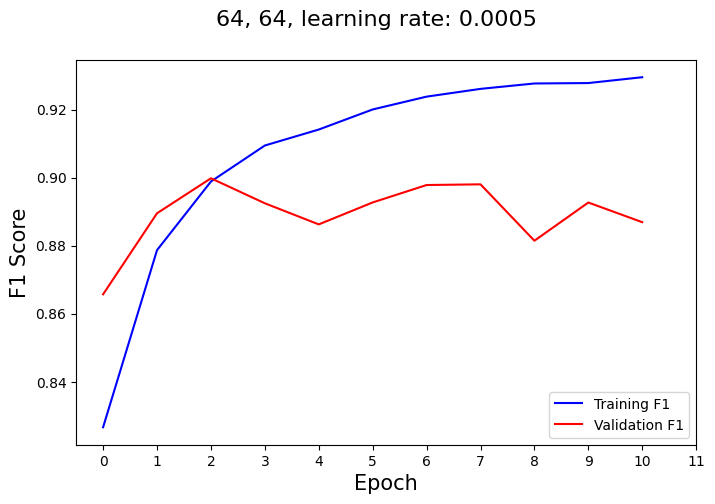

In [25]:
#plotting f1
plt.figure(figsize=(8, 5))  # Create a new figure for each plot
plt.suptitle(f'64, 64, learning rate: 0.0005', fontsize=16)
plt.ylabel('F1 Score', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.plot(hp_history.history['f1_score'], color='b', label='Training F1')
plt.plot(hp_history.history['val_f1_score'], color='r', label='Validation F1')
plt.legend(loc='lower right')

plt.xticks(range(0, len(hp_history.history['f1_score']) + 1, 1))
plt.show()

149/149 [==============================] - 1s 6ms/step
predicted_accuracy = 0.8237653018151119
predicted_precision = 0.9188251001335114
predicted_recall = 0.8663141993957704
predicted_f1_score = 0.8917973305688739


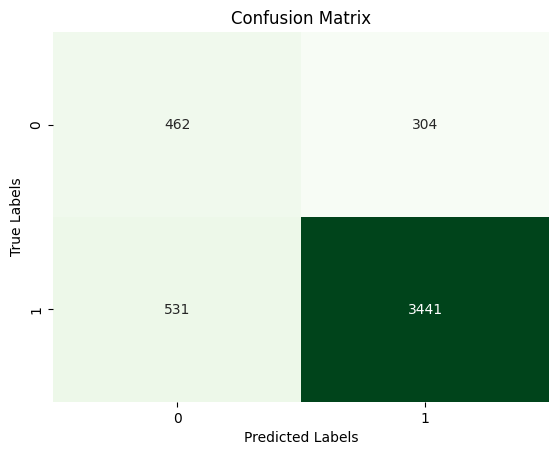

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# predict using trained model with X_test dataset
y_pred1 = best_model.predict(X_test)
y_pred_binary1 = (y_pred1 >= 0.5).astype('float32')


# Accuracy
accuracy1 = accuracy_score(y_test, y_pred_binary1)
print(f'predicted_accuracy = {accuracy1}')
# Precision
precision1 = precision_score(y_test, y_pred_binary1)
print(f'predicted_precision = {precision1}')
# Recall
recall1 = recall_score(y_test, y_pred_binary1)
print(f'predicted_recall = {recall1}')
# F1 Score
f11 = f1_score(y_test, y_pred_binary1)
print(f'predicted_f1_score = {f11}')

# compute confusion matrix
cm = confusion_matrix(y_test, y_pred_binary1)

# plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# predict using trained model with X_test dataset
y_pred2 = model.predict(X_test)
y_pred_binary2 = (y_pred2 > 0.14).astype('float32')


# Accuracy
accuracy2 = accuracy_score(y_test, y_pred_binary2)
print(f'predicted_accuracy = {accuracy2}')
# Precision
precision2 = precision_score(y_test, y_pred_binary2)
print(f'predicted_precision = {precision2}')
# Recall
recall2 = recall_score(y_test, y_pred_binary2)
print(f'predicted_recall = {recall2}')
# F1 Score
f12 = f1_score(y_test, y_pred_binary2)
print(f'predicted_f1_score = {f12}')


# compute confusion matrix
cm = confusion_matrix(y_test, y_pred_binary2)

# plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()